(50000, 32, 32)

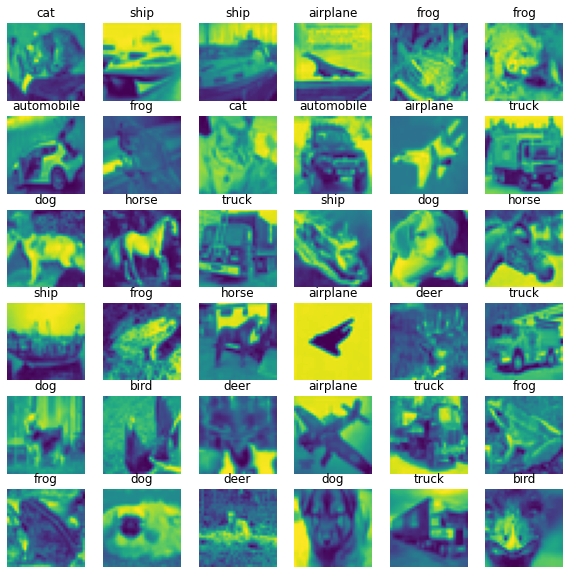

In [3]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX[:,:,:,0]
testX = testX[:,:,:,0]

plt.figure(figsize=(10, 10))
for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(testX[i])
    plt.title(class_names[testY[i].item(0)]) 
    plt.axis("off")
    
trainX.shape

In [4]:
from tensorflow import keras
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Activation

model = keras.Sequential()
model.add(Flatten(input_shape=(32, 32)))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_names)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

hist = model.fit(trainX, 
                 trainY, 
                 epochs=10,
                 validation_split=0.2,
                 verbose=1)

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 2.1054 - sparse_categorical_accuracy: 0.2314 - val_loss: 2.0349 - val_sparse_categorical_accuracy: 0.2562
Epoch 2/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9826 - sparse_categorical_accuracy: 0.2833 - val_loss: 1.9408 - val_sparse_categorical_accuracy: 0.3026
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9210 - sparse_categorical_accuracy: 0.3077 - val_loss: 1.8867 - val_sparse_categorical_accuracy: 0.3350
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8842 - sparse_categorical_accuracy: 0.3249 - val_loss: 1.8873 - val_sparse_categorical_accuracy: 0.3247
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8608 - sparse_categorical_accuracy: 0.3341 - val_loss: 1.8546 - val_sparse_categorical_accuracy: 0.3427
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8413 - spars

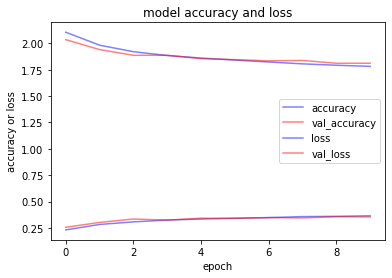

In [6]:
plt.plot(hist.history['sparse_categorical_accuracy'], 'b', alpha = 0.5, label = 'accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], 'r', alpha = 0.5, label = 'val_accuracy')
plt.plot(hist.history['loss'], 'b', alpha = 0.5, label = 'loss')
plt.plot(hist.history['val_loss'], 'r', alpha = 0.5, label = 'val_loss')
plt.title('model accuracy and loss')
plt.ylabel('accuracy or loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [7]:
score = model.evaluate(testX, testY, verbose=0)
print("Test loss:", round(score[0],2))
print("Test accuracy:", round(score[1],2))

# model.save('cifar10_model.h5')

Test loss: 1.82
Test accuracy: 0.35


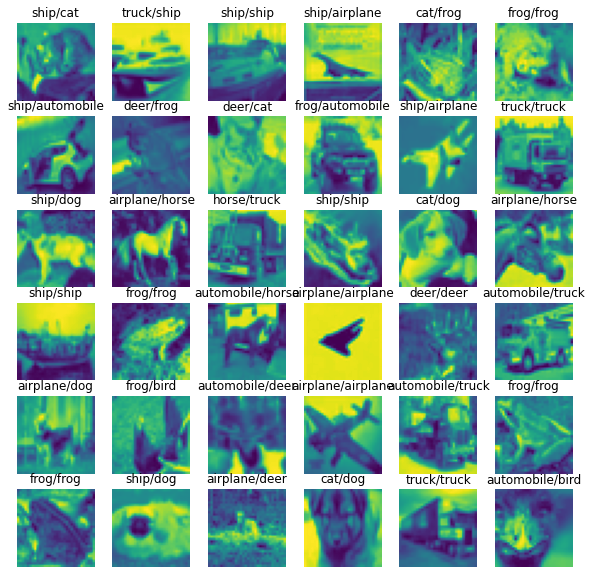

In [8]:
import numpy as np
from tensorflow import keras

# model = keras.models.load_model('cifar10_model.h5')
predictions = model.predict(testX)

plt.figure(figsize=(10, 10))
for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(testX[i])
    plt.title(class_names[np.argmax(predictions[i])]+'/'+class_names[testY[i].item(0)])
    plt.axis("off") 